Purpose

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from matplotlib import rc
warnings.filterwarnings('ignore')
import gpplot as gpp
from sklearn.metrics import auc
#Set default settings for plotting
sns.set_style('ticks')
sns.set_context('talk')
mpl.rc('pdf', fonttype=42)
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [2]:
variants = pd.read_table('../../data_v3/Fig 1_3_PanPAM on-target/processed/panpam_avglfc_v2.txt')

Panel 3d -- Comparison between SpG and NG in our PanPAM data

In [3]:
fractionactive = pd.read_table('../../data_v3/Fig 1_3_PanPAM on-target/processed/fractionactive_allsgRNA_v1.txt')

In [4]:
gpp.set_aesthetics(context='talk', palette='Set2')

In [5]:
n_pam = []
for i in fractionactive['N_PAM']:
    if i == 'NGGN':
        pam =i
    elif i == 'NGAN':
        pam = i
    elif i == 'NGTN':
        pam = i 
    elif i == 'NGCN':
        pam = i
    elif i == 'NAAN':
        pam = i
    elif i == 'NACN':
        pam = i
    elif i == 'NAGN':
        pam = i
    elif i == 'NATN':
        pam = i
    else:
        pam = 'NYNN'
    n_pam.append(pam)
    
    

In [6]:
fractionactive['N_PAM_plot'] = n_pam

In [7]:
fractionactive = fractionactive.sort_values(by='N_PAM_plot', ascending=True)

In [8]:
gpp.set_aesthetics(context='paper')

In [9]:
color_dictionary = dict({'NGGN':'#fc8d62',
                  'NGAN':'#e78ac3',
                  'NGTN': '#a6d854',
                  'NGCN': '#8da0cb',
                   'NAAN': '#ffd92f',
                  'NACN' : '#a6cee3',
                        'NAGN': '#fb9a99',
                        'NATN': '#fdbf6f',
                        'NYNN': '#b3b3b3'})

Text(0, 0.5, 'Cas9-NG \n fraction active')

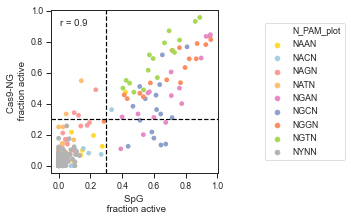

In [10]:
g, ax = plt.subplots(figsize=(3,3))
g = sns.scatterplot(x='A375_449_AVGLFC_frompDNA', y='A375_275_AVGLFC_frompDNA',
               data=fractionactive, hue= 'N_PAM_plot', palette=color_dictionary, linewidth=0)
gpp.add_correlation(x='A375_449_AVGLFC_frompDNA', y='A375_275_AVGLFC_frompDNA',
               data=fractionactive)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.axhline(0.3, linestyle = 'dashed', color = 'black')
plt.axvline(0.3, linestyle = 'dashed', color = 'black')
#plt.xlim(0,1)
plt.xlabel('SpG \n fraction active')
plt.ylabel('Cas9-NG \n fraction active')
#plt.title('Fraction active \n 4 nuc PAM')
#plt.savefig('../../../../Manuscripts/2021 Cas9 Variants/Figures/panels/Fig 3/spg+ng_fractionactive_v4.pdf', dpi=1000, bbox_inches='tight', transparent=True)

Panel 3e -- ROC-AUC calculations by 5-type for PAM flexible variants

True positives: essential guides active PAMs

False positives: nonessential guides with active PAMs

Activity defined as fraction active >= 0.7


In [11]:
def get_roc_auc(df, col):
    df = df.sort_values(by=col)
    df['ess_cumsum'] = np.cumsum(df['ess-val'])
    df['non_ess_cumsum'] = np.cumsum(df['non-ess-val'])
    df['fpr'] = df['non_ess_cumsum']/(df['non_ess_cumsum'].iloc[-1])
    df['tpr'] = df['ess_cumsum']/(df['ess_cumsum'].iloc[-1])
    df.head()
    roc_auc = auc(df['fpr'],df['tpr'])
    roc_df = pd.DataFrame({'False_Positive_Rate':list(df.fpr), 'True_Positive_Rate':list(df.tpr)})
    return roc_auc

WT (RDA_085)

In [12]:
#Consider only essential and nonessential guides for this ROC-AUC analysis

roc_auc_input = variants[variants['Construct IDs'].str.contains('ssential')]
roc_auc_input['Construct IDs'].value_counts()

Essential       10187
NonEssential     6215
Name: Construct IDs, dtype: int64

In [13]:
#Define true positive and false positive sets
roc_auc_input['ess-val'] = [1 if r['Construct IDs'] == 'Essential' else 0 for i,r in roc_auc_input.iterrows()]
roc_auc_input['non-ess-val'] = [0 if r['Construct IDs'] == 'Essential' else 1 for i,r in roc_auc_input.iterrows()]

In [14]:
#get PAMs active with WT
wt_active = (fractionactive[fractionactive['A375_085_AVGLFC_frompDNA'] >=0.7])
wt_active = wt_active[['PAM']]

In [15]:
wt_roc_auc_input = pd.merge(wt_active, roc_auc_input, on = 'PAM', how='inner')

1. all sgRNA

In [16]:
rda_085_auc = get_roc_auc(wt_roc_auc_input, 'A375_085_AVGLFC_frompDNA')
rda_085_auc

0.9495007032348804

2. G19 sgRNA

In [17]:
wt_roc_auc_input_g19 = wt_roc_auc_input[wt_roc_auc_input.G19 =='y']

In [18]:
rda_085_auc_g19 = get_roc_auc(wt_roc_auc_input_g19, 'A375_085_AVGLFC_frompDNA')
rda_085_auc_g19

0.9491662183969876

3. g20 sgRNA

In [19]:
wt_roc_auc_input_g20 = wt_roc_auc_input[wt_roc_auc_input.g20 =='y']

In [20]:
rda_085_auc_g20 = get_roc_auc(wt_roc_auc_input_g20, 'A375_085_AVGLFC_frompDNA')
rda_085_auc_g20

0.9485247959824231

4. G20 sgRNA

In [21]:
wt_roc_auc_input_G20 = wt_roc_auc_input[(wt_roc_auc_input.g20 == 'n') & (wt_roc_auc_input.G19 == 'n')]

In [22]:
rda_085_auc_G20 = get_roc_auc(wt_roc_auc_input_G20, 'A375_085_AVGLFC_frompDNA')
rda_085_auc_G20

0.9574314574314574

xCas9-3.7 (RDA_154)

In [23]:
#get PAMs active with xCas9
active = (fractionactive[fractionactive['A375_154_AVGLFC_frompDNA'] >=0.7])
active = active[['PAM']]
print(len(active))

2


In [24]:
xcas_roc_auc_input = pd.merge(active, roc_auc_input, on = 'PAM', how='inner')

1. all sgRNA

In [25]:
rda_154_auc = get_roc_auc(xcas_roc_auc_input, 'A375_154_AVGLFC_frompDNA')
rda_154_auc

0.7859313938341295

2. G19 sgRNA

In [26]:
xcas_roc_auc_inputg19 = xcas_roc_auc_input[xcas_roc_auc_input.G19 =='y']

In [27]:
rda_154_auc_g19 = get_roc_auc(xcas_roc_auc_inputg19, 'A375_154_AVGLFC_frompDNA')
rda_154_auc_g19

0.8

3. g20 sgRNA

In [28]:
xcas_roc_auc_input_g20 = xcas_roc_auc_input[xcas_roc_auc_input.g20 =='y']

In [29]:
rda_154_auc_g20 = get_roc_auc(xcas_roc_auc_input_g20, 'A375_154_AVGLFC_frompDNA')
rda_154_auc_g20

0.8205705705705706

4. G20 sgRNA

In [30]:
xcas_roc_auc_input_G20 = xcas_roc_auc_input[(xcas_roc_auc_input.g20 == 'n') & (xcas_roc_auc_input.G19 == 'n')]

In [31]:
rda_154_auc_G20 = get_roc_auc(xcas_roc_auc_input_G20, 'A375_154_AVGLFC_frompDNA')
rda_154_auc_G20

0.7283950617283951

Cas9-VQR (RDA_155)

In [32]:
#get PAMs active with Cas9-VQR
active = (fractionactive[fractionactive['A375_155_AVGLFC_frompDNA'] >=0.7])
active = active[['PAM']]
print(len(active))

vqr_roc_auc_input = pd.merge(active, roc_auc_input, on = 'PAM', how='inner')

print('1. all sgRNA')

rda_155_auc = get_roc_auc(vqr_roc_auc_input, 'A375_155_AVGLFC_frompDNA')
print(rda_155_auc)

print('2. G19 sgRNA')

vqr_roc_auc_inputg19 = vqr_roc_auc_input[vqr_roc_auc_input.G19 =='y']

rda_155_auc_g19 = get_roc_auc(vqr_roc_auc_inputg19, 'A375_155_AVGLFC_frompDNA')
print(rda_155_auc_g19)

print('3. g20 sgRNA')

vqr_roc_auc_input_g20 = vqr_roc_auc_input[vqr_roc_auc_input.g20 =='y']

rda_155_auc_g20 = get_roc_auc(vqr_roc_auc_input_g20, 'A375_155_AVGLFC_frompDNA')
print(rda_155_auc_g20)

print('4. G20 sgRNA')

vqr_roc_auc_input_G20 = vqr_roc_auc_input[(vqr_roc_auc_input.g20 == 'n') & (vqr_roc_auc_input.G19 == 'n')]

rda_155_auc_G20 = get_roc_auc(vqr_roc_auc_input_G20, 'A375_155_AVGLFC_frompDNA')
print(rda_155_auc_G20)

4
1. all sgRNA
0.9426163723916533
2. G19 sgRNA
0.9958448753462604
3. g20 sgRNA
0.938804457953394
4. G20 sgRNA
0.9473684210526316


Cas9-NG(RDA_275)

In [33]:
c = 'A375_275_AVGLFC_frompDNA'

#get PAMs active with Cas9-VQR
active = (fractionactive[fractionactive[c] >=0.7])
active = active[['PAM']]
print(len(active))

ng_roc_auc_input = pd.merge(active, roc_auc_input, on = 'PAM', how='inner')

print('1. all sgRNA')

rda_275_auc = get_roc_auc(ng_roc_auc_input, c)
print(rda_275_auc)

print('2. G19 sgRNA')

ng_roc_auc_inputg19 = ng_roc_auc_input[ng_roc_auc_input.G19 =='y']

rda_275_auc_g19 = get_roc_auc(ng_roc_auc_inputg19, c)
print(rda_275_auc_g19)

print('3. g20 sgRNA')

ng_roc_auc_input_g20 = ng_roc_auc_input[ng_roc_auc_input.g20 =='y']

rda_275_auc_g20 = get_roc_auc(ng_roc_auc_input_g20, c)
print(rda_275_auc_g20)

print('4. G20 sgRNA')

ng_roc_auc_input_G20 = ng_roc_auc_input[(ng_roc_auc_input.g20 == 'n') & (ng_roc_auc_input.G19 == 'n')]

rda_275_auc_G20 = get_roc_auc(ng_roc_auc_input_G20, c)
print(rda_275_auc_G20)

18
1. all sgRNA
0.8696305686345527
2. G19 sgRNA
0.8844642195031518
3. g20 sgRNA
0.8621661690087907
4. G20 sgRNA
0.8965721040189124


SpG (RDA_449)

In [34]:
c = 'A375_449_AVGLFC_frompDNA'

#get PAMs active with Cas9-VQR
active = (fractionactive[fractionactive[c] >=0.7])
active = active[['PAM']]
print(len(active))

spg_roc_auc_input = pd.merge(active, roc_auc_input, on = 'PAM', how='inner')

print('1. all sgRNA')

rda_449_auc = get_roc_auc(spg_roc_auc_input, c)
print(rda_449_auc)

print('2. G19 sgRNA')

spg_roc_auc_inputg19 = spg_roc_auc_input[spg_roc_auc_input.G19 =='y']

rda_449_auc_g19 = get_roc_auc(spg_roc_auc_inputg19, c)
print(rda_449_auc_g19)

print('3. g20 sgRNA')

spg_roc_auc_input_g20 = spg_roc_auc_input[spg_roc_auc_input.g20 =='y']

rda_449_auc_g20 = get_roc_auc(spg_roc_auc_input_g20, c)
print(rda_449_auc_g20)

print('4. G20 sgRNA')

spg_roc_auc_input_G20 = spg_roc_auc_input[(spg_roc_auc_input.g20 == 'n') & (spg_roc_auc_input.G19 == 'n')]

rda_449_auc_G20 = get_roc_auc(spg_roc_auc_input_G20, c)
print(rda_449_auc_G20)

24
1. all sgRNA
0.8808876329623948
2. G19 sgRNA
0.9136281141725788
3. g20 sgRNA
0.8805640137604016
4. G20 sgRNA
0.8842123056118999


These values are used in Prism to generate the ROC-AUC barplots by 5-type

Panel 3b -- calculations for table of active or intermediate PAMs

In [35]:
#active

conds = fractionactive[['A375_085_AVGLFC_frompDNA', 'A375_154_AVGLFC_frompDNA', 'A375_155_AVGLFC_frompDNA',
                       'A375_156_AVGLFC_frompDNA', 'A375_275_AVGLFC_frompDNA', 'A375_449_AVGLFC_frompDNA']]
for c in conds:
    #print(c)
    active = fractionactive[fractionactive[c] >=0.7]
    print(len(active))

16
2
4
0
18
24


In [36]:
#intermediate

conds = fractionactive[['A375_085_AVGLFC_frompDNA', 'A375_154_AVGLFC_frompDNA', 'A375_155_AVGLFC_frompDNA',
                       'A375_156_AVGLFC_frompDNA', 'A375_275_AVGLFC_frompDNA', 'A375_449_AVGLFC_frompDNA']]
for c in conds:
    #print(c)
    intermediate = fractionactive[(fractionactive[c] <0.7) & (fractionactive[c] >= 0.3)]
    print(len(intermediate))

2
14
7
1
43
41


Supplementary Figure 3

Here, we will plot correlations of SpG and NG, first with all sgRNAs in the lib (Supp Fig 3f), then filtered for NG PAMs (Supp Fig 3g)

([<matplotlib.axis.YTick at 0x7f9ea36290b8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

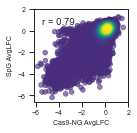

In [37]:
gpp.set_aesthetics(context='paper')
fig, ax = plt.subplots(figsize=(1.7,1.7))

gpp.point_densityplot(data=variants, x = 'A375_275_AVGLFC_frompDNA', y='A375_449_AVGLFC_frompDNA')
gpp.add_correlation(data=variants, x = 'A375_275_AVGLFC_frompDNA', y='A375_449_AVGLFC_frompDNA')
plt.xlabel('Cas9-NG AvgLFC', fontsize=7)
plt.ylabel('SpG AvgLFC', fontsize=7)
plt.tick_params(axis='both', labelsize=7)
plt.xticks([-6,-4,-2,0,2])
plt.yticks([-6,-4,-2,0,2])
#plt.savefig('../../Figures/panels/Fig 3/Cas9-NG v SpG all sgRNA.pdf', dpi=1000, transparent=True, bbox_inches='tight')

In [42]:
print(len(variants))

18651


In [38]:
no_ctrl = variants[variants['Construct IDs'] != 'Control']

In [39]:
no_ctrl['N_PAM'] = ['N' + p[1:3] + 'N' for p in no_ctrl.PAM]

In [44]:
n_pam = no_ctrl[no_ctrl['N_PAM'].str.startswith('NG')]

In [46]:
print(len(n_pam))

4525


([<matplotlib.axis.YTick at 0x7f9ea36cce10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

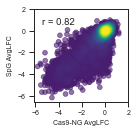

In [41]:
gpp.set_aesthetics(context='paper')
fig, ax = plt.subplots(figsize=(1.7,1.7))

gpp.point_densityplot(data=n_pam, x = 'A375_275_AVGLFC_frompDNA', y='A375_449_AVGLFC_frompDNA')
gpp.add_correlation(data=n_pam, x = 'A375_275_AVGLFC_frompDNA', y='A375_449_AVGLFC_frompDNA')
plt.xlabel('Cas9-NG AvgLFC', fontsize=7)
plt.ylabel('SpG AvgLFC', fontsize=7)
plt.tick_params(axis='both', labelsize=7)
plt.xticks([-6,-4,-2,0,2])
plt.yticks([-6,-4,-2,0,2])
#plt.savefig('../../Figures/panels/Fig 3/Cas9-NG v SpG NG pams.pdf', dpi=1000, transparent=True, bbox_inches='tight')